<a href="https://colab.research.google.com/github/chanseongparkk/2022_Data_Analysis_Intern_practice/blob/main/07_04_02_%EA%B2%B0%EC%B8%A1%EA%B0%92%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 결측값 처리

### 1. 결측값 확인

In [ ]:
# 라이브러리 호출

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# os에 따른 font 깨짐 제거를 위해 font 지정

import os

if os.name == "nt":
    font_family = "Malgun Gothic"
else: #mac os
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터값 설정

sns.set(font = font_family, rc = {"axes.unicode_minus" : False})

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# warning 제거

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 결측값 데이터 생성

### 실습 데이터 생성

temp_dict = {"A열": [np.nan, 4, 6, 5, 5, np.nan],
            "B열": ["a", "a", np.nan, "b", "b", "b"],
            "C열": [np.nan, 3.5, -1.5, np.nan, 5.5, np.nan],
            "D열": [1, 0, 1, 0, 1, 1]}

missing_data = pd.DataFrame(temp_dict)
missing_data

,A열,B열,C열,D열
0,NaN,a,NaN,1
1,4.0,a,3.5,0
2,6.0,NaN,-1.5,1
3,5.0,b,NaN,0
4,5.0,b,5.5,1
5,NaN,b,NaN,1


In [ ]:
# 결측값 데이터 확인

missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A열      4 non-null      float64
 1   B열      5 non-null      object 
 2   C열      3 non-null      float64
 3   D열      6 non-null      int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 320.0+ bytes


In [ ]:
# 결측값 확인

missing_data.isna()

,A열,B열,C열,D열
0,True,False,True,False
1,False,False,False,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False
5,True,False,True,False


In [ ]:
# 결측값 갯수 확인

missing_data.isnull().sum()

A열    2
B열    1
C열    3
D열    0
dtype: int64

In [ ]:
# 속성별 결측값 갯수 확인

print(missing_data.A열.isna().sum())
print(missing_data.B열.isna().sum())
print(missing_data.C열.isna().sum())
print(missing_data.D열.isna().sum())

2
1
3
0


<AxesSubplot:>

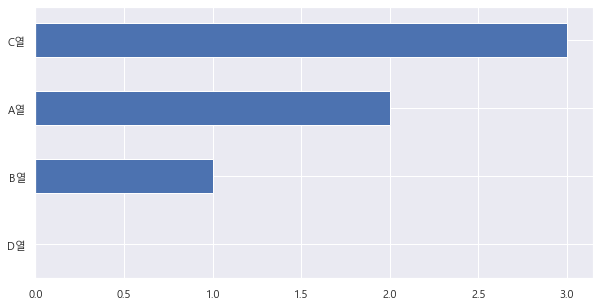

In [ ]:
# 결측값 시각화: 결측값 많은 순으로 정렬

missing_data.isnull().sum().sort_values().plot.barh(figsize = (10,5))

### 2. 결측치 처리(삭제)

In [ ]:
# 결측값이 들어가있는 행 제거

missing_data.dropna(axis = 0)

,A열,B열,C열,D열
1,4.0,a,3.5,0
4,5.0,b,5.5,1


In [ ]:
# 결측값이 들어가있는 열 제거

missing_data.dropna(axis = 1)

,D열
0,1
1,0
2,1
3,0
4,1
5,1


In [ ]:
# thresh 파라미터 이용

missing_data.dropna(thresh = 5, axis = 1) #결측값 제거 후 5개 미만으로 남는 열 삭제

,B열,D열
0,a,1
1,a,0
2,NaN,1
3,b,0
4,b,1
5,b,1


### 3. 결측값 처리(대치법)

#### 3-1 fillna(): 특정 값으로 na 대체

In [ ]:


### 특정 값으로 채우기: 0으로 채우기

missing_data["A열"].fillna(0)
missing_data["A열"].replace(np.nan, 0) #둘 다 같음

0    0.0
1    4.0
2    6.0
3    5.0
4    5.0
5    0.0
Name: A열, dtype: float64

In [ ]:
### 이전 값으로 채우기

missing_data["B열"].fillna(method="ffill")

0    a
1    a
2    a
3    b
4    b
5    b
Name: B열, dtype: object

In [ ]:
### 이후 값으로 채우기

missing_data["C열"].fillna(method="bfill")

0    3.5
1    3.5
2   -1.5
3    5.5
4    5.5
5    NaN
Name: C열, dtype: float64

In [ ]:
### 결측값을 속성별 평균으로 대체하기

missing_data.fillna(missing_data.mean())

,A열,B열,C열,D열
0,5.0,a,2.5,1
1,4.0,a,3.5,0
2,6.0,NaN,-1.5,1
3,5.0,b,2.5,0
4,5.0,b,5.5,1
5,5.0,b,2.5,1


#### 3-2 SimpleImputer(): sklearn의 열의 평균이나 중앙값, 최빈값으로 대체하게 해주는 클래스
- strategy(most_frequent: 최빈값, mean: 평균값, median: 중앙값)

In [ ]:
df = missing_data.copy()

# SimpleImputer 생성

imputer = SimpleImputer(strategy = "most_frequent")



In [ ]:
# A열의 최빈값을 결측치에 대체

df["A열"] = imputer.fit_transform(df[["A열"]])


,A열,B열,C열,D열
0,5.0,a,NaN,1
1,4.0,a,3.5,0
2,6.0,NaN,-1.5,1
3,5.0,b,NaN,0
4,5.0,b,5.5,1
5,5.0,b,NaN,1


In [ ]:
df

,A열,B열,C열,D열
0,5.0,a,NaN,1
1,4.0,a,3.5,0
2,6.0,NaN,-1.5,1
3,5.0,b,NaN,0
4,5.0,b,5.5,1
5,5.0,b,NaN,1


In [ ]:
# 나머지 열의 결측값을 최빈값으로 대체

df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [ ]:
df

,A열,B열,C열,D열
0,5.0,a,-1.5,1
1,4.0,a,3.5,0
2,6.0,b,-1.5,1
3,5.0,b,-1.5,0
4,5.0,b,5.5,1
5,5.0,b,-1.5,1


#### 3-3 linear_model(): sklearn의 선형회귀법을 이용하여 값을 대체(조건부 평균 대체)

In [ ]:
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data",
                  header = None,
                  names = ["sex", "length", "diameter", "height",
                          "whole_weight", "shucked_weight",
                          "viscera_weight", "shell_weight","rings"])

# 20개의 테스트 데이터만 저장

df_missing = data.copy()[:20]

In [ ]:
# 결측값 데이터 생성
df_missing.loc[0:4,"whole_weight"] = np.nan

In [ ]:
df_missing.head(10)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,NaN,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,NaN,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,NaN,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,NaN,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [ ]:
# 학습데이터 생성: X,y에 결측치 삭제

X = df_missing.dropna(axis = 0)[["diameter","height","shell_weight"]]
y = df_missing.dropna(axis = 0)["whole_weight"]

In [ ]:
X.head()

,diameter,height,shell_weight
5,0.300,0.095,0.120
6,0.415,0.150,0.330
7,0.425,0.125,0.260
8,0.370,0.125,0.165
9,0.440,0.150,0.320


In [ ]:
#선형회귀모델 생성

reg = LinearRegression()

reg_m = reg.fit(X,y)

# 선형회귀모델로 'whole_weight' 추정값 계산

y_pred = reg.predict(df_missing.loc[:,["diameter","height","shell_weight"]])

y_pred

array([0.49254286, 0.18873668, 0.68747377, 0.50646044, 0.14810905,
       0.31971105, 0.81030386, 0.7493438 , 0.52804836, 0.85355676,
       0.6024405 , 0.44821428, 0.5794571 , 0.65250514, 0.51008432,
       0.67516872, 0.26825093, 0.41836777, 0.2830785 , 0.35896888])

In [ ]:
## 선형회귀 모델의 예측값을 결측값에 대체

## fillna()함수 이용
# faltten: 다차원->1차원으로 평탄화해수는 함수

df_missing["whole_weight"].fillna(pd.Series(y_pred.flatten()),inplace = True) #inplace = True의 경우 df_missing에 바로 결측치 대체가 된다.

## 결과확인
df_missing

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.492543,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.188737,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.687474,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.506460,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.148109,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.351500,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.777500,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.768000,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.509500,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.894500,0.3145,0.1510,0.320,19
